# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #6C3483; text-align: center; line-height: 1.25;"><b>Parkinson Disease<span style="color: #000000"> EDA & Prediction</span></b><br><span style="color: #4A235A; font-size: 24px">with Various Machine Learning Models </span></h1>
<hr>
​

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #6C3483; text-align: center; line-height: 1.25;">Columns Description</h1>
<hr>

<ol start="1">
  <li>name - ASCII subject name and recording number</li>
  <li>MDVP:Fo(Hz) - Average vocal fundamental frequency</li>
<li>MDVP:Fhi(Hz) - Maximum vocal fundamental frequency</li>
<li>MDVP:Flo(Hz) - Minimum vocal fundamental frequency</li>
<li>MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency</li>
<li>MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude</li>
<li>NHR, HNR - Two measures of the ratio of noise to tonal components in the voice</li>
<li>status - The health status of the subject (one) - Parkinson's, (zero) - healthy</li>
<li>RPDE, D2 - Two nonlinear dynamical complexity measures</li>
<li>DFA - Signal fractal scaling exponent</li>
<li>spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation</li>
</ol>

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #6C3483; text-align: center; line-height: 1.25;">Import Essential Libraries</h1>
<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os, sys

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #6C3483; text-align: center; line-height: 1.25;">Load Dataset</h1>
<hr>

In [2]:
parkinson_dataset = pd.read_csv("Parkinsson disease.csv")

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #6C3483; text-align: center; line-height: 1.25;">Viewing Dataset</h1>
<hr>

In [3]:
parkinson_dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
parkinson_dataset.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [5]:
parkinson_dataset.sample(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
60,phon_R01_S17_1,209.144,237.494,109.379,0.00282,0.00001,0.00147,0.00152,0.00442,0.01861,...,0.02925,0.00871,25.554,0,0.341788,0.678874,-7.040508,0.066994,2.460791,0.101516
170,phon_R01_S42_6,244.990,272.210,239.170,0.00451,0.00002,0.00279,0.00237,0.00837,0.01897,...,0.03253,0.01049,21.528,0,0.522812,0.646818,-7.304500,0.171088,2.095237,0.096220
19,phon_R01_S05_2,156.405,189.398,142.822,0.00768,0.00005,0.00372,0.00399,0.01116,0.03995,...,0.05164,0.03365,17.153,1,0.649554,0.686080,-4.554466,0.340176,2.856676,0.322111
151,phon_R01_S35_6,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,...,0.16942,0.21713,8.441,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
154,phon_R01_S37_2,119.100,128.442,88.833,0.00692,0.00006,0.00393,0.00300,0.01179,0.02682,...,0.04451,0.04611,21.824,1,0.651680,0.659333,-4.239028,0.175691,2.451130,0.247455


# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #6C3483; text-align: center; line-height: 1.25;">Information of Dataset</h1>
<hr>

In [6]:
parkinson_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #6C3483; text-align: center; line-height: 1.25;"><b>Creating Synthetic Data<br><span style="color: #4A235A; font-size: 18px">Due to less number of data, ML models will not be trained properly, so we are creating a function to generate synthetic data based on existing data and data pattern. </span></h1>
<hr>
​

In [7]:
# Get status = 1 (patient) data and set to Dataframe
statusOne = parkinson_dataset[parkinson_dataset['status'] == 1]
pd.DataFrame(statusOne)
statusOne.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 182
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              147 non-null    object 
 1   MDVP:Fo(Hz)       147 non-null    float64
 2   MDVP:Fhi(Hz)      147 non-null    float64
 3   MDVP:Flo(Hz)      147 non-null    float64
 4   MDVP:Jitter(%)    147 non-null    float64
 5   MDVP:Jitter(Abs)  147 non-null    float64
 6   MDVP:RAP          147 non-null    float64
 7   MDVP:PPQ          147 non-null    float64
 8   Jitter:DDP        147 non-null    float64
 9   MDVP:Shimmer      147 non-null    float64
 10  MDVP:Shimmer(dB)  147 non-null    float64
 11  Shimmer:APQ3      147 non-null    float64
 12  Shimmer:APQ5      147 non-null    float64
 13  MDVP:APQ          147 non-null    float64
 14  Shimmer:DDA       147 non-null    float64
 15  NHR               147 non-null    float64
 16  HNR               147 non-null    float64
 1

In [8]:
statusOne.sample(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
72,phon_R01_S19_1,120.080,139.710,111.208,0.00405,0.00003,0.00180,0.00220,0.00540,0.01706,...,0.02921,0.00442,25.742,1,0.495954,0.762959,-5.791820,0.329066,2.205024,0.188180
142,phon_R01_S34_3,198.458,219.290,148.691,0.00376,0.00002,0.00182,0.00215,0.00546,0.03527,...,0.06165,0.01728,18.702,1,0.606273,0.661735,-5.585259,0.310746,2.465528,0.209863
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
97,phon_R01_S24_1,125.036,143.946,116.187,0.01280,0.00010,0.00743,0.00623,0.02228,0.03886,...,0.06406,0.08151,15.338,1,0.629574,0.714485,-4.020042,0.265315,2.671825,0.340623
109,phon_R01_S26_1,193.030,208.900,80.297,0.00766,0.00004,0.00450,0.00389,0.01351,0.03044,...,0.05312,0.00947,21.934,1,0.497554,0.740539,-5.845099,0.278679,2.608749,0.185668


In [9]:
# Get status = 0 (not patient) data and set to Dataframe
statusZero = parkinson_dataset[parkinson_dataset['status'] == 0]
pd.DataFrame(statusZero)
statusZero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 30 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              48 non-null     object 
 1   MDVP:Fo(Hz)       48 non-null     float64
 2   MDVP:Fhi(Hz)      48 non-null     float64
 3   MDVP:Flo(Hz)      48 non-null     float64
 4   MDVP:Jitter(%)    48 non-null     float64
 5   MDVP:Jitter(Abs)  48 non-null     float64
 6   MDVP:RAP          48 non-null     float64
 7   MDVP:PPQ          48 non-null     float64
 8   Jitter:DDP        48 non-null     float64
 9   MDVP:Shimmer      48 non-null     float64
 10  MDVP:Shimmer(dB)  48 non-null     float64
 11  Shimmer:APQ3      48 non-null     float64
 12  Shimmer:APQ5      48 non-null     float64
 13  MDVP:APQ          48 non-null     float64
 14  Shimmer:DDA       48 non-null     float64
 15  NHR               48 non-null     float64
 16  HNR               48 non-null     float64
 1

In [10]:
statusZero.sample(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
31,phon_R01_S07_2,199.228,209.512,192.091,0.00241,0.00001,0.00134,0.00138,0.00402,0.01015,...,0.01513,0.00167,30.940,0,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501
175,phon_R01_S43_5,115.380,123.109,108.634,0.00332,0.00003,0.00160,0.00199,0.00480,0.01503,...,0.02436,0.00401,26.005,0,0.405991,0.761255,-5.966779,0.197938,1.974857,0.184067
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
172,phon_R01_S43_2,110.739,113.597,100.139,0.00356,0.00003,0.00170,0.00200,0.00510,0.01484,...,0.02261,0.00430,26.550,0,0.369090,0.776158,-6.085567,0.192375,1.889002,0.174152


# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 24px; color: #6C3483; text-align: center; line-height: 1.25;">Creating Synthetic data for Parkinson Disease patient (status: 1)</h1>
<hr>

In [11]:
columns = statusOne.columns.to_numpy()
iteration_count = 10
new_df = pd.DataFrame(columns=columns)

for i in range(iteration_count):
    for k in statusOne.iterrows():
        data_obj = {}
        for j in range(columns.size):
            random_index = np.random.randint(0,5, dtype='int')
            data_obj[columns[j]] = statusOne.iloc[random_index][columns[j]]
        new_df = new_df.append(data_obj, ignore_index=True)

df = parkinson_dataset.append(new_df, ignore_index=True)
df.to_csv('expandedOne.csv')

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 24px; color: #6C3483; text-align: center; line-height: 1.25;">Creating Synthetic data for Non Parkinson Disease patient (status: 0)</h1>
<hr>

In [12]:
columns = statusZero.columns.to_numpy()
iteration_count = 10
new_df = pd.DataFrame(columns=columns)

for i in range(iteration_count):
    for k in statusZero.iterrows():
        data_obj = {}
        for j in range(columns.size):
            random_index = np.random.randint(0,5, dtype='int')
            data_obj[columns[j]] = statusZero.iloc[random_index][columns[j]]
        new_df = new_df.append(data_obj, ignore_index=True)

df = parkinson_dataset.append(new_df, ignore_index=True)
df.to_csv('expandedZero.csv')

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 24px; color: #6C3483; text-align: center; line-height: 1.25;">Merge expanded dataset: statusZero and statusOne</h1>
<hr>

In [13]:
# Info of expandedOne
expand1 = pd.read_csv('expandedOne.csv')
expand1.drop(['Unnamed: 0'], axis=1, inplace=True)
expand1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1665 non-null   object 
 1   MDVP:Fo(Hz)       1665 non-null   float64
 2   MDVP:Fhi(Hz)      1665 non-null   float64
 3   MDVP:Flo(Hz)      1665 non-null   float64
 4   MDVP:Jitter(%)    1665 non-null   float64
 5   MDVP:Jitter(Abs)  1665 non-null   float64
 6   MDVP:RAP          1665 non-null   float64
 7   MDVP:PPQ          1665 non-null   float64
 8   Jitter:DDP        1665 non-null   float64
 9   MDVP:Shimmer      1665 non-null   float64
 10  MDVP:Shimmer(dB)  1665 non-null   float64
 11  Shimmer:APQ3      1665 non-null   float64
 12  Shimmer:APQ5      1665 non-null   float64
 13  MDVP:APQ          1665 non-null   float64
 14  Shimmer:DDA       1665 non-null   float64
 15  NHR               1665 non-null   float64
 16  HNR               1665 non-null   float64


In [14]:
# Info of expandZero
expand0 = pd.read_csv('expandedZero.csv')
expand0.drop(['Unnamed: 0'], axis=1, inplace=True)
expand0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              675 non-null    object 
 1   MDVP:Fo(Hz)       675 non-null    float64
 2   MDVP:Fhi(Hz)      675 non-null    float64
 3   MDVP:Flo(Hz)      675 non-null    float64
 4   MDVP:Jitter(%)    675 non-null    float64
 5   MDVP:Jitter(Abs)  675 non-null    float64
 6   MDVP:RAP          675 non-null    float64
 7   MDVP:PPQ          675 non-null    float64
 8   Jitter:DDP        675 non-null    float64
 9   MDVP:Shimmer      675 non-null    float64
 10  MDVP:Shimmer(dB)  675 non-null    float64
 11  Shimmer:APQ3      675 non-null    float64
 12  Shimmer:APQ5      675 non-null    float64
 13  MDVP:APQ          675 non-null    float64
 14  Shimmer:DDA       675 non-null    float64
 15  NHR               675 non-null    float64
 16  HNR               675 non-null    float64
 1

In [15]:
# Concat two dataframe
frames = [expand0, expand1]

finalDF = pd.concat(frames)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #6C3483; text-align: center; line-height: 1.25;">Reading Expanded dataset after creating and concat data</h1>
<hr>

In [16]:
finalDF.sample(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
633,phon_R01_S01_5,116.014,131.111,111.555,0.00968,0.000090,0.00544,0.00696,0.01505,0.06134,...,0.08270,0.01309,20.644,1,0.417356,0.823484,-4.075192,0.335590,2.486855,0.368975
86,phon_R01_S21_3,178.222,202.450,141.047,0.00321,0.000020,0.00163,0.00194,0.00488,0.03759,...,0.06219,0.03151,15.924,1,0.598714,0.712199,-6.366916,0.335753,2.654271,0.144614
1343,phon_R01_S01_5,122.400,157.302,74.997,0.00997,0.000080,0.00465,0.00781,0.01505,0.06134,...,0.06545,0.01929,20.644,1,0.414783,0.815285,-3.747787,0.335590,2.342259,0.368975
138,phon_R01_S33_5,112.239,126.609,104.095,0.00472,0.000040,0.00238,0.00290,0.00715,0.05643,...,0.09211,0.02629,17.366,1,0.640945,0.701404,-5.634576,0.306014,2.419253,0.209191
715,phon_R01_S01_4,116.682,148.650,74.997,0.00784,0.000080,0.00544,0.00698,0.01505,0.06134,...,0.10470,0.01767,21.033,1,0.458359,0.819235,-3.747787,0.234513,2.342259,0.284654
461,phon_R01_S07_2,199.228,211.604,197.079,0.00180,0.000010,0.00134,0.00138,0.00498,0.01015,...,0.01689,0.00065,30.940,0,0.340068,0.741899,-7.964984,0.177551,1.544609,0.068501
783,phon_R01_S01_2,122.400,148.650,111.555,0.00784,0.000080,0.00370,0.00908,0.01966,0.04374,...,0.10470,0.01929,21.033,1,0.434969,0.823484,-4.117501,0.334147,2.405554,0.368674
418,phon_R01_S07_5,202.266,211.604,192.055,0.00180,0.000009,0.00094,0.00106,0.00278,0.00954,...,0.01513,0.00065,30.940,0,0.422229,0.738703,-7.964984,0.163519,1.743867,0.096320
1222,phon_R01_S01_4,119.992,141.781,110.655,0.01050,0.000110,0.00502,0.00554,0.01966,0.05492,...,0.09403,0.02211,20.644,1,0.414783,0.815285,-4.443179,0.234513,2.405554,0.410335
264,phon_R01_S07_2,199.228,211.604,192.091,0.00180,0.000009,0.00093,0.00107,0.00402,0.00958,...,0.01407,0.00065,26.775,0,0.422229,0.738703,-7.695734,0.178540,1.743867,0.096320


# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #6C3483; text-align: center; line-height: 1.25;">Shape of Expanded Dataset</h1>
<hr>

In [17]:
finalDF.shape

(2340, 24)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 18px; color: #6C3483; text-align: center; line-height: 1.25;"><b style="color: #000000;">Note:</b> Now, we can see from above info that, the rows of dataset have been increased</h1>
<hr>

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #6C3483; text-align: center; line-height: 1.25;">Checking Duplicated & Null Values</h1>
<hr>

In [18]:
finalDF = finalDF[~finalDF.index.duplicated(keep='first')]

In [19]:
finalDF.index.duplicated().sum()

0

In [20]:
finalDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665 entries, 0 to 1664
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1665 non-null   object 
 1   MDVP:Fo(Hz)       1665 non-null   float64
 2   MDVP:Fhi(Hz)      1665 non-null   float64
 3   MDVP:Flo(Hz)      1665 non-null   float64
 4   MDVP:Jitter(%)    1665 non-null   float64
 5   MDVP:Jitter(Abs)  1665 non-null   float64
 6   MDVP:RAP          1665 non-null   float64
 7   MDVP:PPQ          1665 non-null   float64
 8   Jitter:DDP        1665 non-null   float64
 9   MDVP:Shimmer      1665 non-null   float64
 10  MDVP:Shimmer(dB)  1665 non-null   float64
 11  Shimmer:APQ3      1665 non-null   float64
 12  Shimmer:APQ5      1665 non-null   float64
 13  MDVP:APQ          1665 non-null   float64
 14  Shimmer:DDA       1665 non-null   float64
 15  NHR               1665 non-null   float64
 16  HNR               1665 non-null   float64


In [21]:
finalDF.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #6C3483; text-align: center; line-height: 1.25;">Visualization among Dataset Attributes</h1>
<hr>

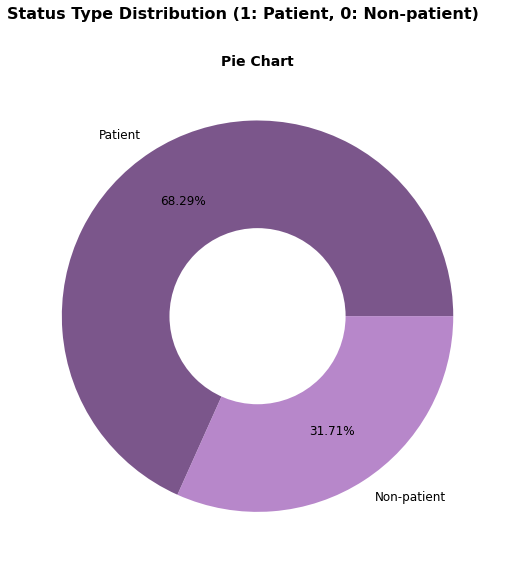

In [22]:
labels=['Patient', 'Non-patient']

order=finalDF['status'].value_counts().index

colors = ['#5B2C6F','#A569BD']

plt.figure(figsize=(16, 9))
plt.suptitle('Status Type Distribution (1: Patient, 0: Non-patient)', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif')

plt.title('Pie Chart', fontweight='bold', fontsize=14,fontfamily='sans-serif')
plt.pie(finalDF['status'].value_counts(), labels=labels, pctdistance=0.7, 
        autopct='%.2f%%', textprops={'fontsize':12}, colors=colors, wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

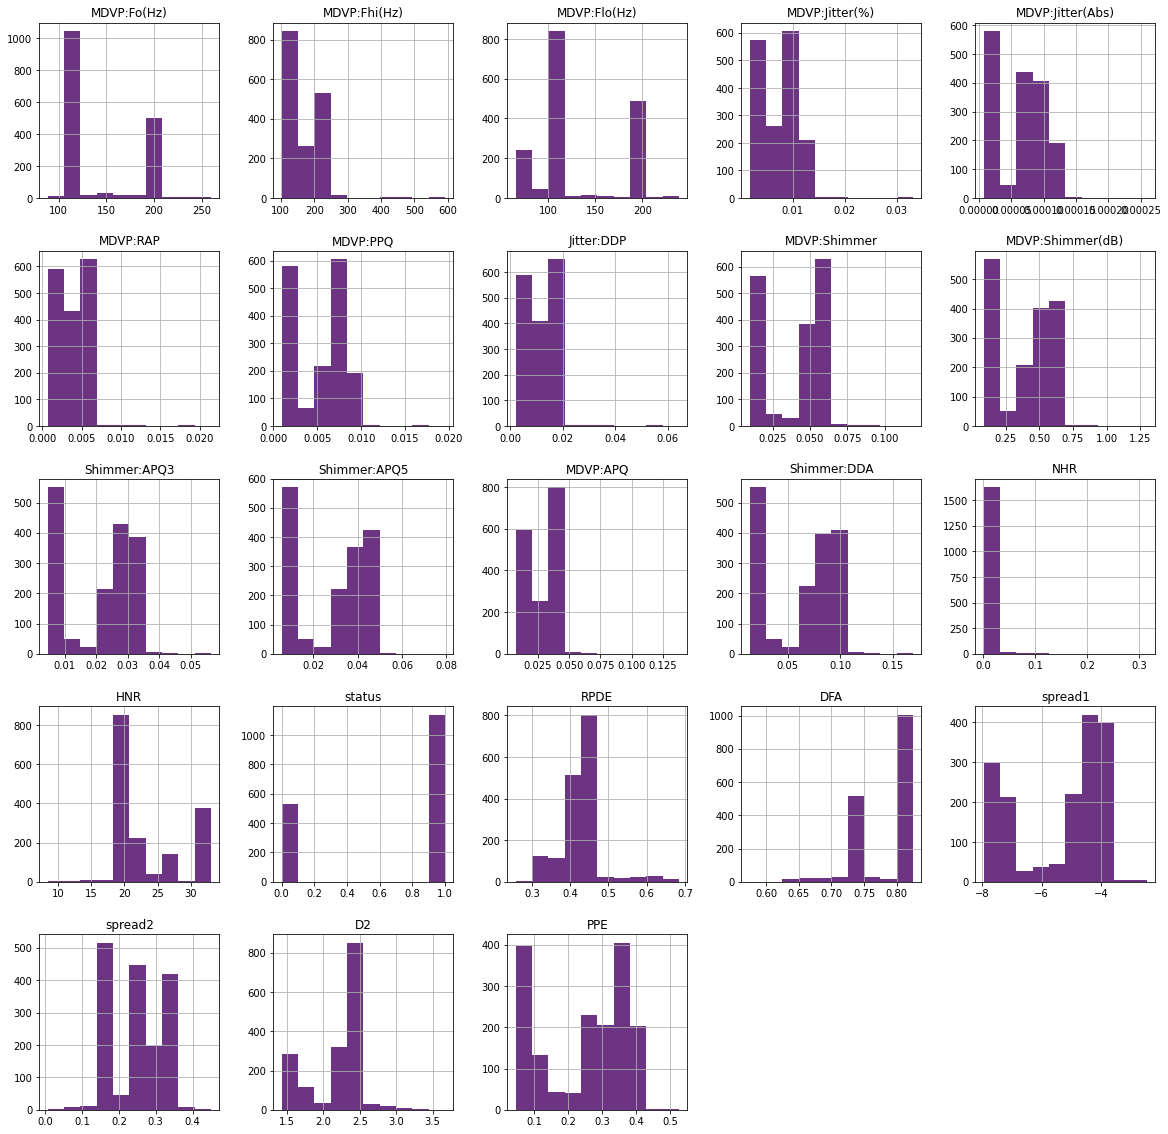

In [23]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
finalDF.hist(ax=ax, color = "#6C3483")
plt.show()

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #6C3483; text-align: center; line-height: 1.25;">Dataset Description</h1>
<hr>

In [24]:
finalDF.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,...,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000
mean,146.083079,169.184953,131.829598,0.007429,0.000060,0.003774,0.005074,0.011387,0.039552,0.374841,...,0.061721,0.013589,23.426851,0.682883,0.431054,0.785707,-5.363439,0.252474,2.170642,0.254506
std,38.827845,44.926220,44.058666,0.004115,0.000038,0.002144,0.002980,0.006460,0.021961,0.213903,...,0.034904,0.016181,5.067272,0.465493,0.052958,0.046824,1.547610,0.068880,0.375168,0.133744
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,116.676000,137.871000,110.655000,0.002890,0.000010,0.001440,0.001480,0.004960,0.011520,0.111000,...,0.019190,0.003390,19.649000,0.000000,0.414783,0.741899,-7.067931,0.177551,2.007923,0.096320
50%,119.992000,148.650000,111.555000,0.007840,0.000070,0.004650,0.005540,0.013940,0.043740,0.482000,...,0.065450,0.013530,20.651000,1.000000,0.429895,0.815285,-4.813031,0.266482,2.332180,0.284654
75%,197.076000,209.512000,192.055000,0.010500,0.000090,0.005440,0.006980,0.016330,0.061340,0.584000,...,0.094030,0.019290,26.775000,1.000000,0.458359,0.819521,-4.117501,0.334147,2.405554,0.368674
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #6C3483; text-align: center; line-height: 1.25;">Correlation Matrix of Dataset</h1>
<hr>

<AxesSubplot:>

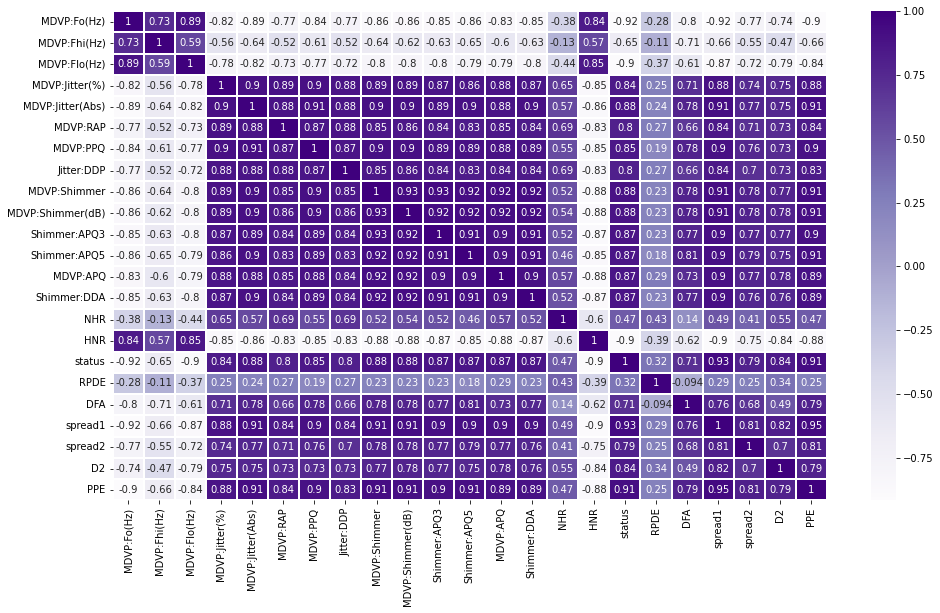

In [25]:
plt.figure(figsize=(16, 9))
sns.heatmap(finalDF.corr(), annot=True, cmap='Purples', linewidths=0.1)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #6C3483; text-align: center; line-height: 1.25;">Feature Engineering</h1>
<hr>

In [26]:
print("\033[95mOriginal shape of data: ", finalDF.shape)
x = finalDF.drop(['status','name'], axis=1)
print("Featues shape:", x.shape)
y = finalDF.status
print("Target shape: ", y.shape)

Original shape of data:  (1665, 24)
Featues shape: (1665, 22)
Target shape:  (1665,)


In [27]:
# Min-Max Scaler
scaler = MinMaxScaler((-1, 1))

# fits the data normally 
X = scaler.fit_transform(x)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #6C3483; text-align: center; line-height: 1.25;">Train-Test Split</h1>
<hr>

In [28]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2) 

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #6C3483; text-align: center; line-height: 1.25;">Model Implementation</h1>
<hr>

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 24px; color: #6C3483; text-align: center; line-height: 1.25;">Logistic Regression</h1>
<hr>

In [29]:
clf = LogisticRegression()

clf.fit(x_train, y_train)

LogisticRegression()

In [30]:
pred_logistic_train = clf.predict(x_train)
pred_logistic_test = clf.predict(x_test)

In [56]:
log_acc = accuracy_score(y_test, pred_logistic_test)
print('\033[95mAccuracy: ',int(log_acc*100),'%')

Accuracy:  98 %


Text(0.5, 1.05, 'Confusion Matrix for Logistic Regression')

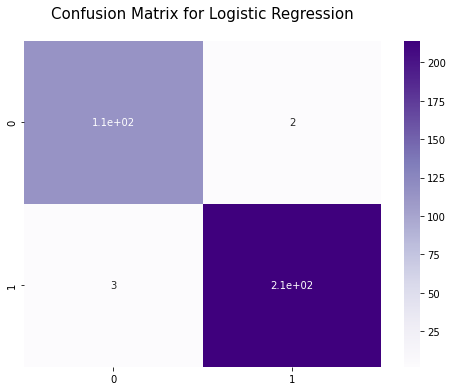

In [32]:
# Confusion matrix of Logistic Regression
log_matrix = confusion_matrix(y_test, pred_logistic_test)
plt.figure(figsize=(8,6))
sns.heatmap(log_matrix, cmap='Purples', annot=True)
plt.title("Confusion Matrix for Logistic Regression",fontsize=15,y=1.05)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 24px; color: #6C3483; text-align: center; line-height: 1.25;">Support Vector Classifier</h1>
<hr>

In [33]:
svec = SVC(kernel='rbf', max_iter=1000)

svec.fit(x_train, y_train)

SVC(max_iter=1000)

In [34]:
svec_train = svec.predict(x_train)
svec_test = svec.predict(x_test)

In [55]:
svec_acc = accuracy_score(y_test, svec_test)
print('\033[95mAccuracy: ',int(svec_acc*100),'%')

Accuracy:  97 %


Text(0.5, 1.05, 'Confusion Matrix for SVC')

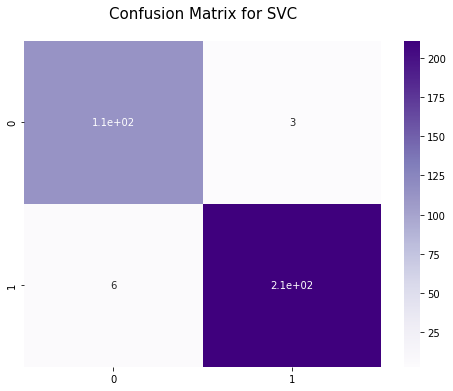

In [36]:
# Confusion matrix of SVC
svec_matrix = confusion_matrix(y_test, svec_test)
plt.figure(figsize=(8,6))
sns.heatmap(svec_matrix, cmap='Purples', annot=True)
plt.title("Confusion Matrix for SVC",fontsize=15,y=1.05)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 24px; color: #6C3483; text-align: center; line-height: 1.25;">Random Forest</h1>
<hr>

In [37]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [38]:
train_pred_rf = rf.predict(x_train)
pred_rf = rf.predict(x_test)

In [54]:
rf_acc = accuracy_score(y_test, pred_rf)
print('\033[95mAccuracy: ',int(rf_acc*100),'%')

Accuracy:  99 %


Text(0.5, 1.05, 'Confusion Matrix for Random Forest')

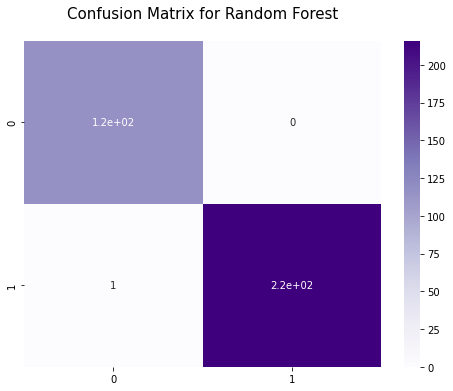

In [40]:
# Confusion matrix of Random Forest
rf_matrix = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(rf_matrix, cmap='Purples', annot=True)
plt.title("Confusion Matrix for Random Forest",fontsize=15,y=1.05)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 24px; color: #6C3483; text-align: center; line-height: 1.25;">Decision Tree</h1>
<hr>

In [41]:
dec = DecisionTreeClassifier()
dec.fit(x_train, y_train)

DecisionTreeClassifier()

In [42]:
train_pred_dec = dec.predict(x_train)
pred_dec = dec.predict(x_test)

In [57]:
dec_acc = accuracy_score(y_test, pred_dec)
print('\033[95mAccuracy: ',int(dec_acc*100),'%')

Accuracy:  99 %


Text(0.5, 1.05, 'Confusion Matrix for Decision Tree')

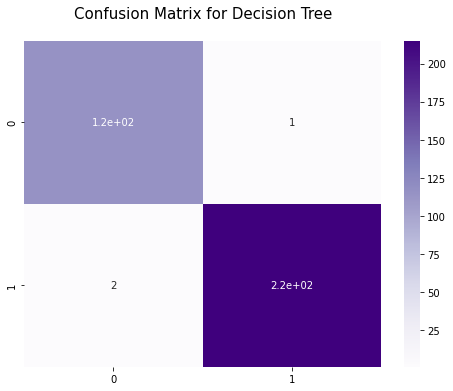

In [44]:
# Confusion matrix of Decision Tree
dec_matrix = confusion_matrix(y_test, pred_dec)
plt.figure(figsize=(8,6))
sns.heatmap(dec_matrix, cmap='Purples', annot=True)
plt.title("Confusion Matrix for Decision Tree",fontsize=15,y=1.05)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 24px; color: #6C3483; text-align: center; line-height: 1.25;">XGB Classifier</h1>
<hr>

In [45]:
xg = xgb.XGBClassifier()

xg.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [46]:
xg_pred_train = xg.predict(x_train)
xg_pred = xg.predict(x_test)

In [58]:
xgb_acc = accuracy_score(y_test, xg_pred)
print('\033[95mAccuracy: ',int(xgb_acc*100),'%')

Accuracy:  99 %


Text(0.5, 1.05, 'Confusion Matrix for XGB Classifier')

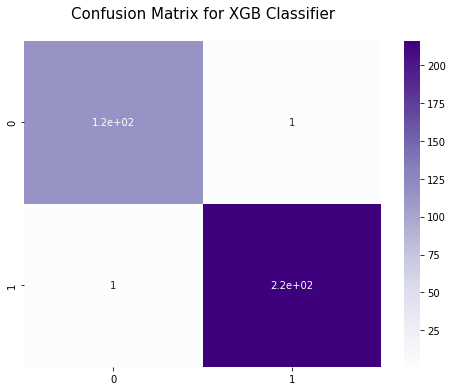

In [59]:
# Confusion matrix of XGB Classifier
xgb_matrix = confusion_matrix(y_test, xg_pred)
plt.figure(figsize=(8,6))
sns.heatmap(xgb_matrix, cmap='Purples', annot=True)
plt.title("Confusion Matrix for XGB Classifier",fontsize=15,y=1.05)

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #6C3483; text-align: center; line-height: 1.25;">Comparison among Model's Accuracy</h1>
<hr>

In [60]:
compareModel = pd.DataFrame({'Model': ['Logistic Regression', 'SVC', 'Random Forest', 'Decision Tree', 'XGB'], 
                             'Accuracy': [log_acc*100, svec_acc*100, rf_acc*100, dec_acc*100, xgb_acc*100]})

compareModel.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='Purples').hide_index()

Model,Accuracy
Random Forest,99.699700
XGB,99.399399
Decision Tree,99.099099
Logistic Regression,98.498498
SVC,97.297297


# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #6C3483; text-align: center; line-height: 1.25;">Conclusions</h1>
<hr>

## <div style="font-family: Trebuchet MS; background-color: #6C3483; color: #FFFFFF; padding: 12px; line-height: 1.5; text-align: center;">We used <b style="color: #F4D03F">Logistic Regression</b>, <b style="color: #F4D03F">Random Forest</b>, <b style="color: #F4D03F">Decision Tree</b>, and <b style="color: #F4D03F">XGB</b>. We got accuracy score and then we have done comparison among accuracy scores of those algorithms. Now, we can see that, <b style="color: #F4D03F">which model has highest accuracy score.</b> <b style="color: #F4D03F">So, we can use that model for Parkinson Disease Prediction.</b></div>

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 32px; color: #6C3483; text-align: center; line-height: 1.25;">Thank You</h1>
<hr>